<a href="https://colab.research.google.com/github/Collokd/Core_Week_7_Independent_Project/blob/master/Week_7_Independent_Project_Collins_Kemboi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - IP Week 7

## 1. Defining the Question

### a) Specifying the Question

The main objective of this project is to determine factors affecting prices of houses and developing a model to effectively predict the sale prices.

### b) Defining the Metric for Success
1. Determining MAIN factors affecting price of houses.
2. Accuratly developing a model that can predict the value of houses.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [0]:
# Loading the Dataset and necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

url = "http://bit.ly/IndependentProjectWeek7Dataset"

data = pd.read_csv(url)

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#

data.shape

(21613, 20)

In [0]:
# Previewing our dataset
#
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [0]:
# Previewing the first 10 rows

data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [0]:
# Previewing the bottom 10 rows

data.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Checking whether each column has an appropriate datatype
#

data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [0]:
# Previewing columns on our dataset
#
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

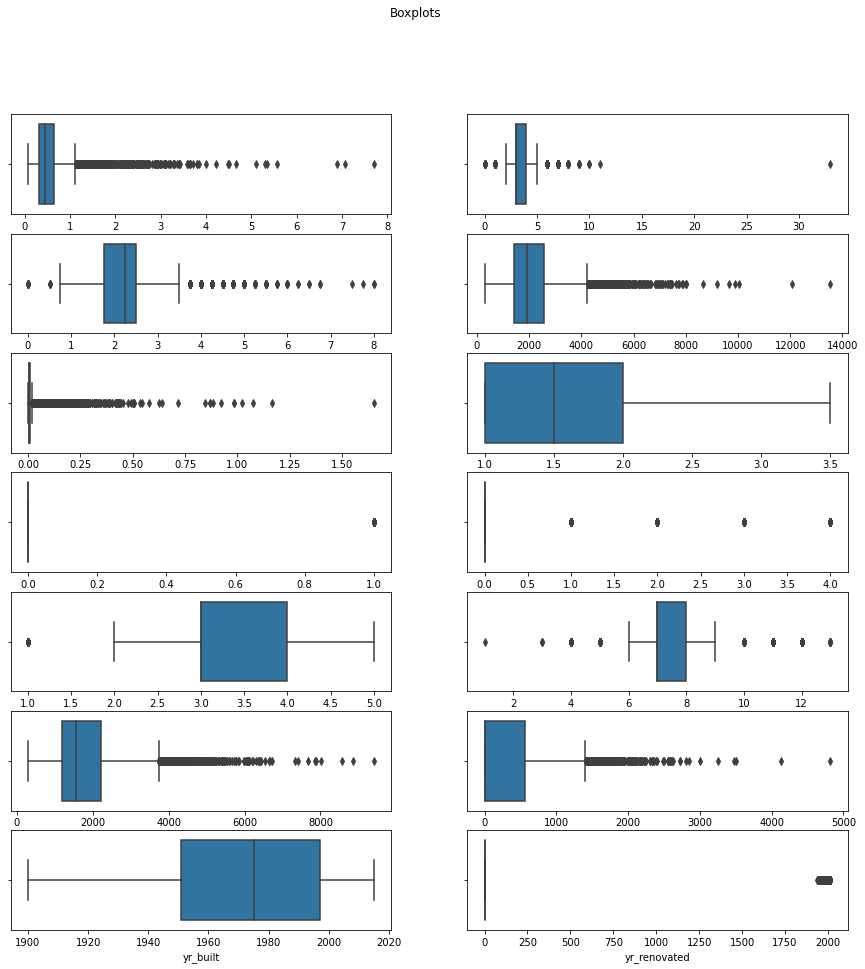

In [0]:
# Checking for Outliers
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(data['price'], ax=ax1)
sns.boxplot(data['bedrooms'], ax=ax2)
sns.boxplot(data['bathrooms'], ax=ax3)
sns.boxplot(data['sqft_living'], ax=ax4)
sns.boxplot(data['sqft_lot'], ax=ax5)
sns.boxplot(data['floors'], ax=ax6)
sns.boxplot(data['waterfront'], ax=ax7)
sns.boxplot(data['view'], ax=ax8)
sns.boxplot(data['condition'], ax=ax9)
sns.boxplot(data['grade'], ax=ax10)
sns.boxplot(data['sqft_above'], ax=ax11)
sns.boxplot(data['sqft_basement'], ax=ax12)
sns.boxplot(data['yr_built'], ax=ax13)
sns.boxplot(data['yr_renovated'], ax=ax14)
plt.show()

In [0]:
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [0]:
# Identifying Outliers on our dataset using Z-test
#
numeric = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']]

from scipy import stats
z = np.abs(stats.zscore(numeric))
print(z)


[[0.88614631 0.86641874 0.39873715 ... 0.21012839 0.9433552  0.26071541]
 [0.63751062 0.00594021 0.39873715 ... 4.7466776  0.43268619 0.18786773]
 [0.36544385 0.98047774 1.47395936 ... 0.21012839 1.07013975 0.17237524]
 ...
 [1.06275071 0.37588065 1.47395936 ... 0.21012839 1.41025258 0.39414129]
 [1.49104567 0.38159993 0.39873715 ... 0.21012839 0.8412214  0.42051149]
 [1.0627507  0.58576282 1.47395936 ... 0.21012839 1.41025258 0.41794772]]


In [0]:
# Dropping outliers identified
new_df= numeric[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 21613
New dataframe size: 18898


In [0]:
# Checking total missing data from our combined datafram
#

new_df.isnull().sum()



id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# There are no missing values from our dataset

In [0]:

# checking for duplicates

new_df.duplicated()

# there are no duplicates

0        False
2        False
3        False
4        False
6        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 18898, dtype: bool

In [0]:
# Saving our clean data
#
new_df.to_csv("clean.csv")

## 6. Exploratory Analysis

> ## i) Univariate Analysis

In [0]:
# Loading our dataset and creating a dataframe.
# previewing our column names.
#
# ----
#
df = pd.read_csv("clean.csv")
df.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Recap of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18898 non-null  int64  
 1   id             18898 non-null  int64  
 2   price          18898 non-null  float64
 3   bedrooms       18898 non-null  int64  
 4   bathrooms      18898 non-null  float64
 5   sqft_living    18898 non-null  int64  
 6   sqft_lot       18898 non-null  int64  
 7   floors         18898 non-null  float64
 8   waterfront     18898 non-null  int64  
 9   view           18898 non-null  int64  
 10  condition      18898 non-null  int64  
 11  grade          18898 non-null  int64  
 12  sqft_above     18898 non-null  int64  
 13  sqft_basement  18898 non-null  int64  
 14  yr_built       18898 non-null  int64  
 15  yr_renovated   18898 non-null  int64  
 16  sqft_living15  18898 non-null  int64  
 17  sqft_lot15     18898 non-null  int64  
dtypes: flo

In [0]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,18898.000000,1.889800e+04,1.889800e+04,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.0,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.0,18898.000000,18898.000000
mean,10834.634988,4.653922e+09,4.798770e+05,3.321357,2.037173,1947.473754,9913.977617,1.481136,0.0,0.091385,3.420203,7.533601,1694.087893,253.385861,1971.943274,0.0,1908.618161,9152.630807
std,6248.277409,2.873835e+09,2.307993e+05,0.846579,0.686955,737.345169,11569.681342,0.539567,0.0,0.400506,0.646825,1.024626,707.362051,386.331351,28.913704,0.0,598.634788,9092.587596
min,0.000000,1.000102e+06,8.200000e+04,1.000000,0.000000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,0.000000,1900.000000,0.0,460.000000,651.000000
25%,5442.250000,2.204500e+09,3.110000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,0.000000,1953.000000,0.0,1460.000000,5000.000000
50%,10795.500000,4.015600e+09,4.300000e+05,3.000000,2.000000,1840.000000,7392.000000,1.000000,0.0,0.000000,3.000000,7.000000,1500.000000,0.000000,1976.000000,0.0,1790.000000,7471.000000
75%,16261.750000,7.399300e+09,5.950000e+05,4.000000,2.500000,2400.000000,9938.000000,2.000000,0.0,0.000000,4.000000,8.000000,2100.000000,500.000000,1997.000000,0.0,2260.000000,9617.750000
max,21612.000000,9.900000e+09,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4270.000000,1610.000000,2015.000000,0.0,4040.000000,93825.000000


In [0]:
# Dropping unnecessary columns
df1 = df.drop(['Unnamed: 0','id'], axis = 1)
df1.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18898 non-null  float64
 1   bedrooms       18898 non-null  int64  
 2   bathrooms      18898 non-null  float64
 3   sqft_living    18898 non-null  int64  
 4   sqft_lot       18898 non-null  int64  
 5   floors         18898 non-null  float64
 6   waterfront     18898 non-null  int64  
 7   view           18898 non-null  int64  
 8   condition      18898 non-null  int64  
 9   grade          18898 non-null  int64  
 10  sqft_above     18898 non-null  int64  
 11  sqft_basement  18898 non-null  int64  
 12  yr_built       18898 non-null  int64  
 13  yr_renovated   18898 non-null  int64  
 14  sqft_living15  18898 non-null  int64  
 15  sqft_lot15     18898 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.3 MB


In [0]:
df1.nunique()

price            3328
bedrooms            6
bathrooms          17
sqft_living       790
sqft_lot         8563
floors              5
waterfront          1
view                3
condition           4
grade               7
sqft_above        751
sqft_basement     206
yr_built          116
yr_renovated        1
sqft_living15     650
sqft_lot15       7571
dtype: int64

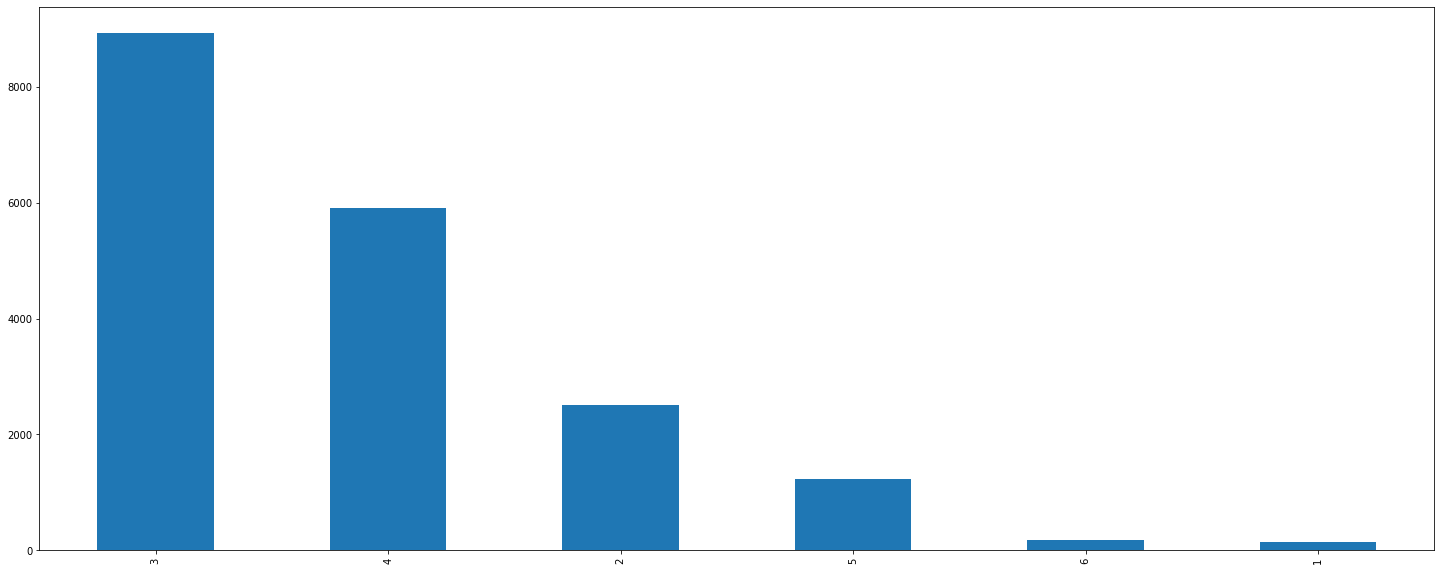

In [0]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['bedrooms'].value_counts().plot.bar()

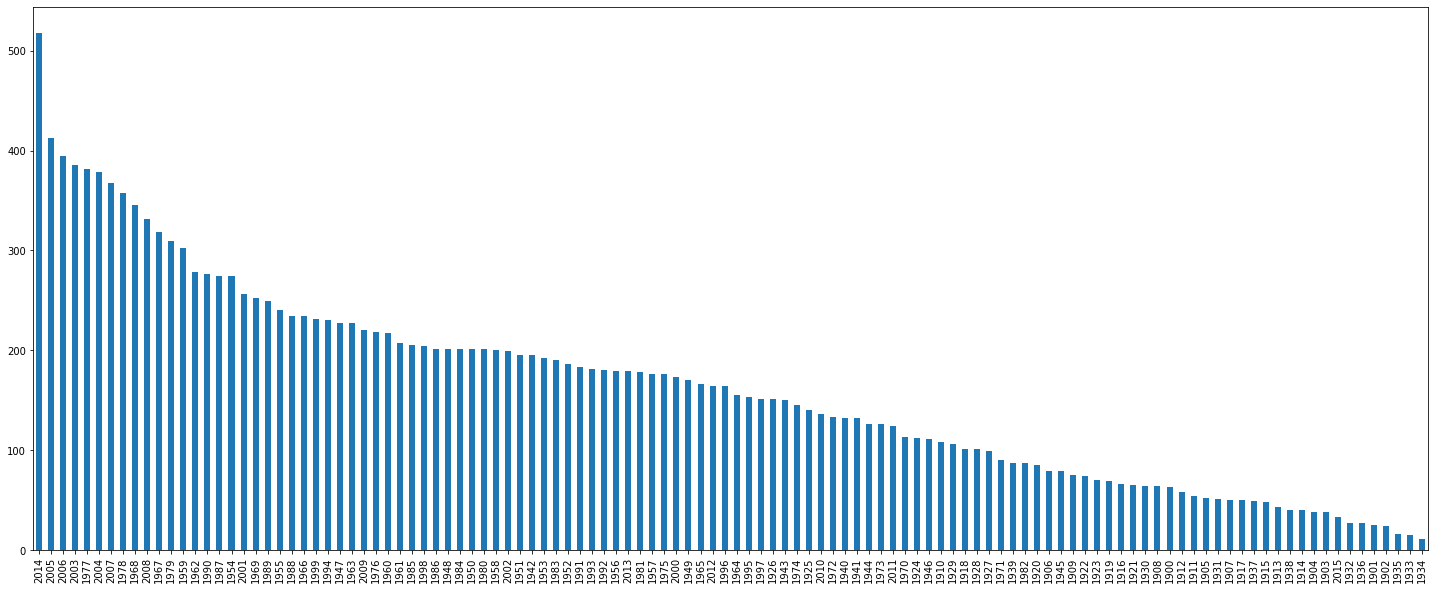

In [0]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['yr_built'].value_counts().plot.bar()

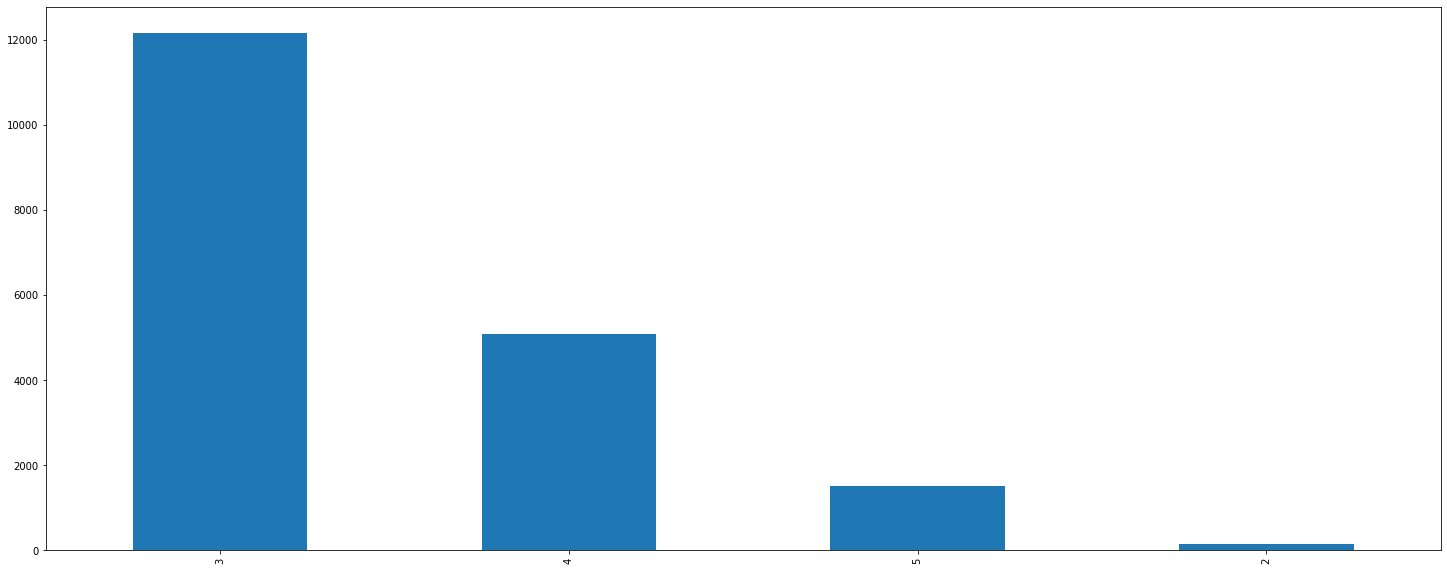

In [0]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['condition'].value_counts().plot.bar()

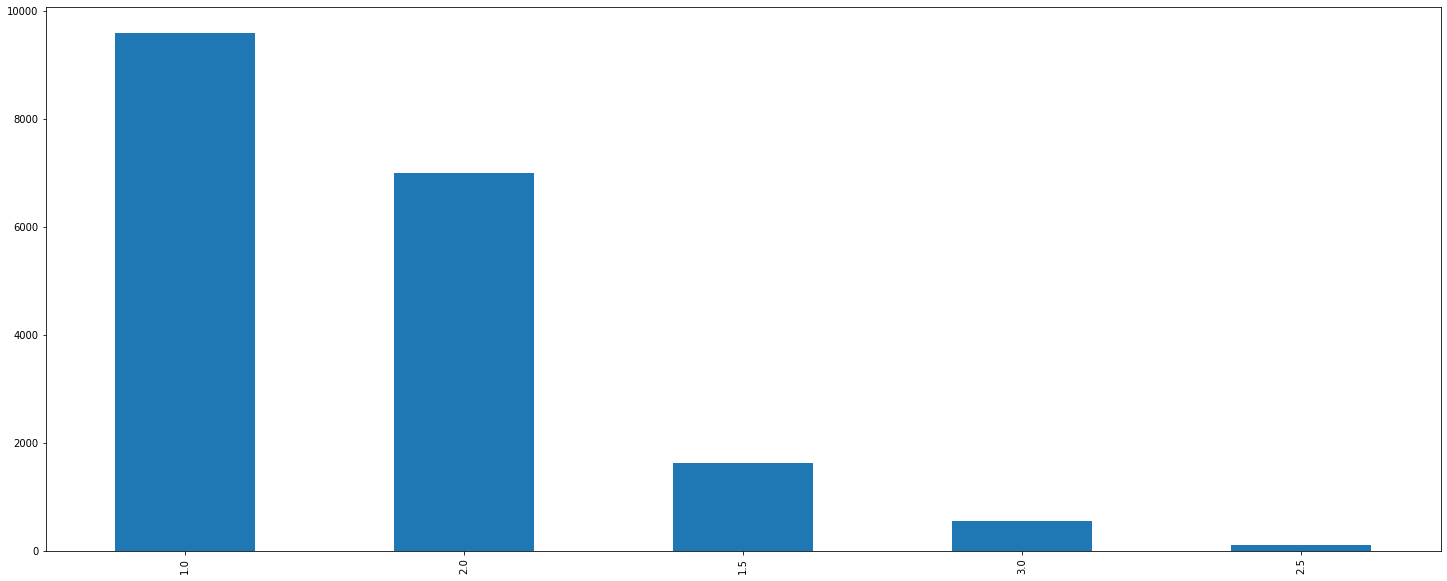

In [0]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
df1['floors'].value_counts().plot.bar()

> ## ii) Bivariate Analysis


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18898 non-null  float64
 1   bedrooms       18898 non-null  int64  
 2   bathrooms      18898 non-null  float64
 3   sqft_living    18898 non-null  int64  
 4   sqft_lot       18898 non-null  int64  
 5   floors         18898 non-null  float64
 6   waterfront     18898 non-null  int64  
 7   view           18898 non-null  int64  
 8   condition      18898 non-null  int64  
 9   grade          18898 non-null  int64  
 10  sqft_above     18898 non-null  int64  
 11  sqft_basement  18898 non-null  int64  
 12  yr_built       18898 non-null  int64  
 13  yr_renovated   18898 non-null  int64  
 14  sqft_living15  18898 non-null  int64  
 15  sqft_lot15     18898 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.3 MB


In [0]:
numerical = df1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15']]

Text(0.5, 1.0, 'Pairplot of Numeric variables.')

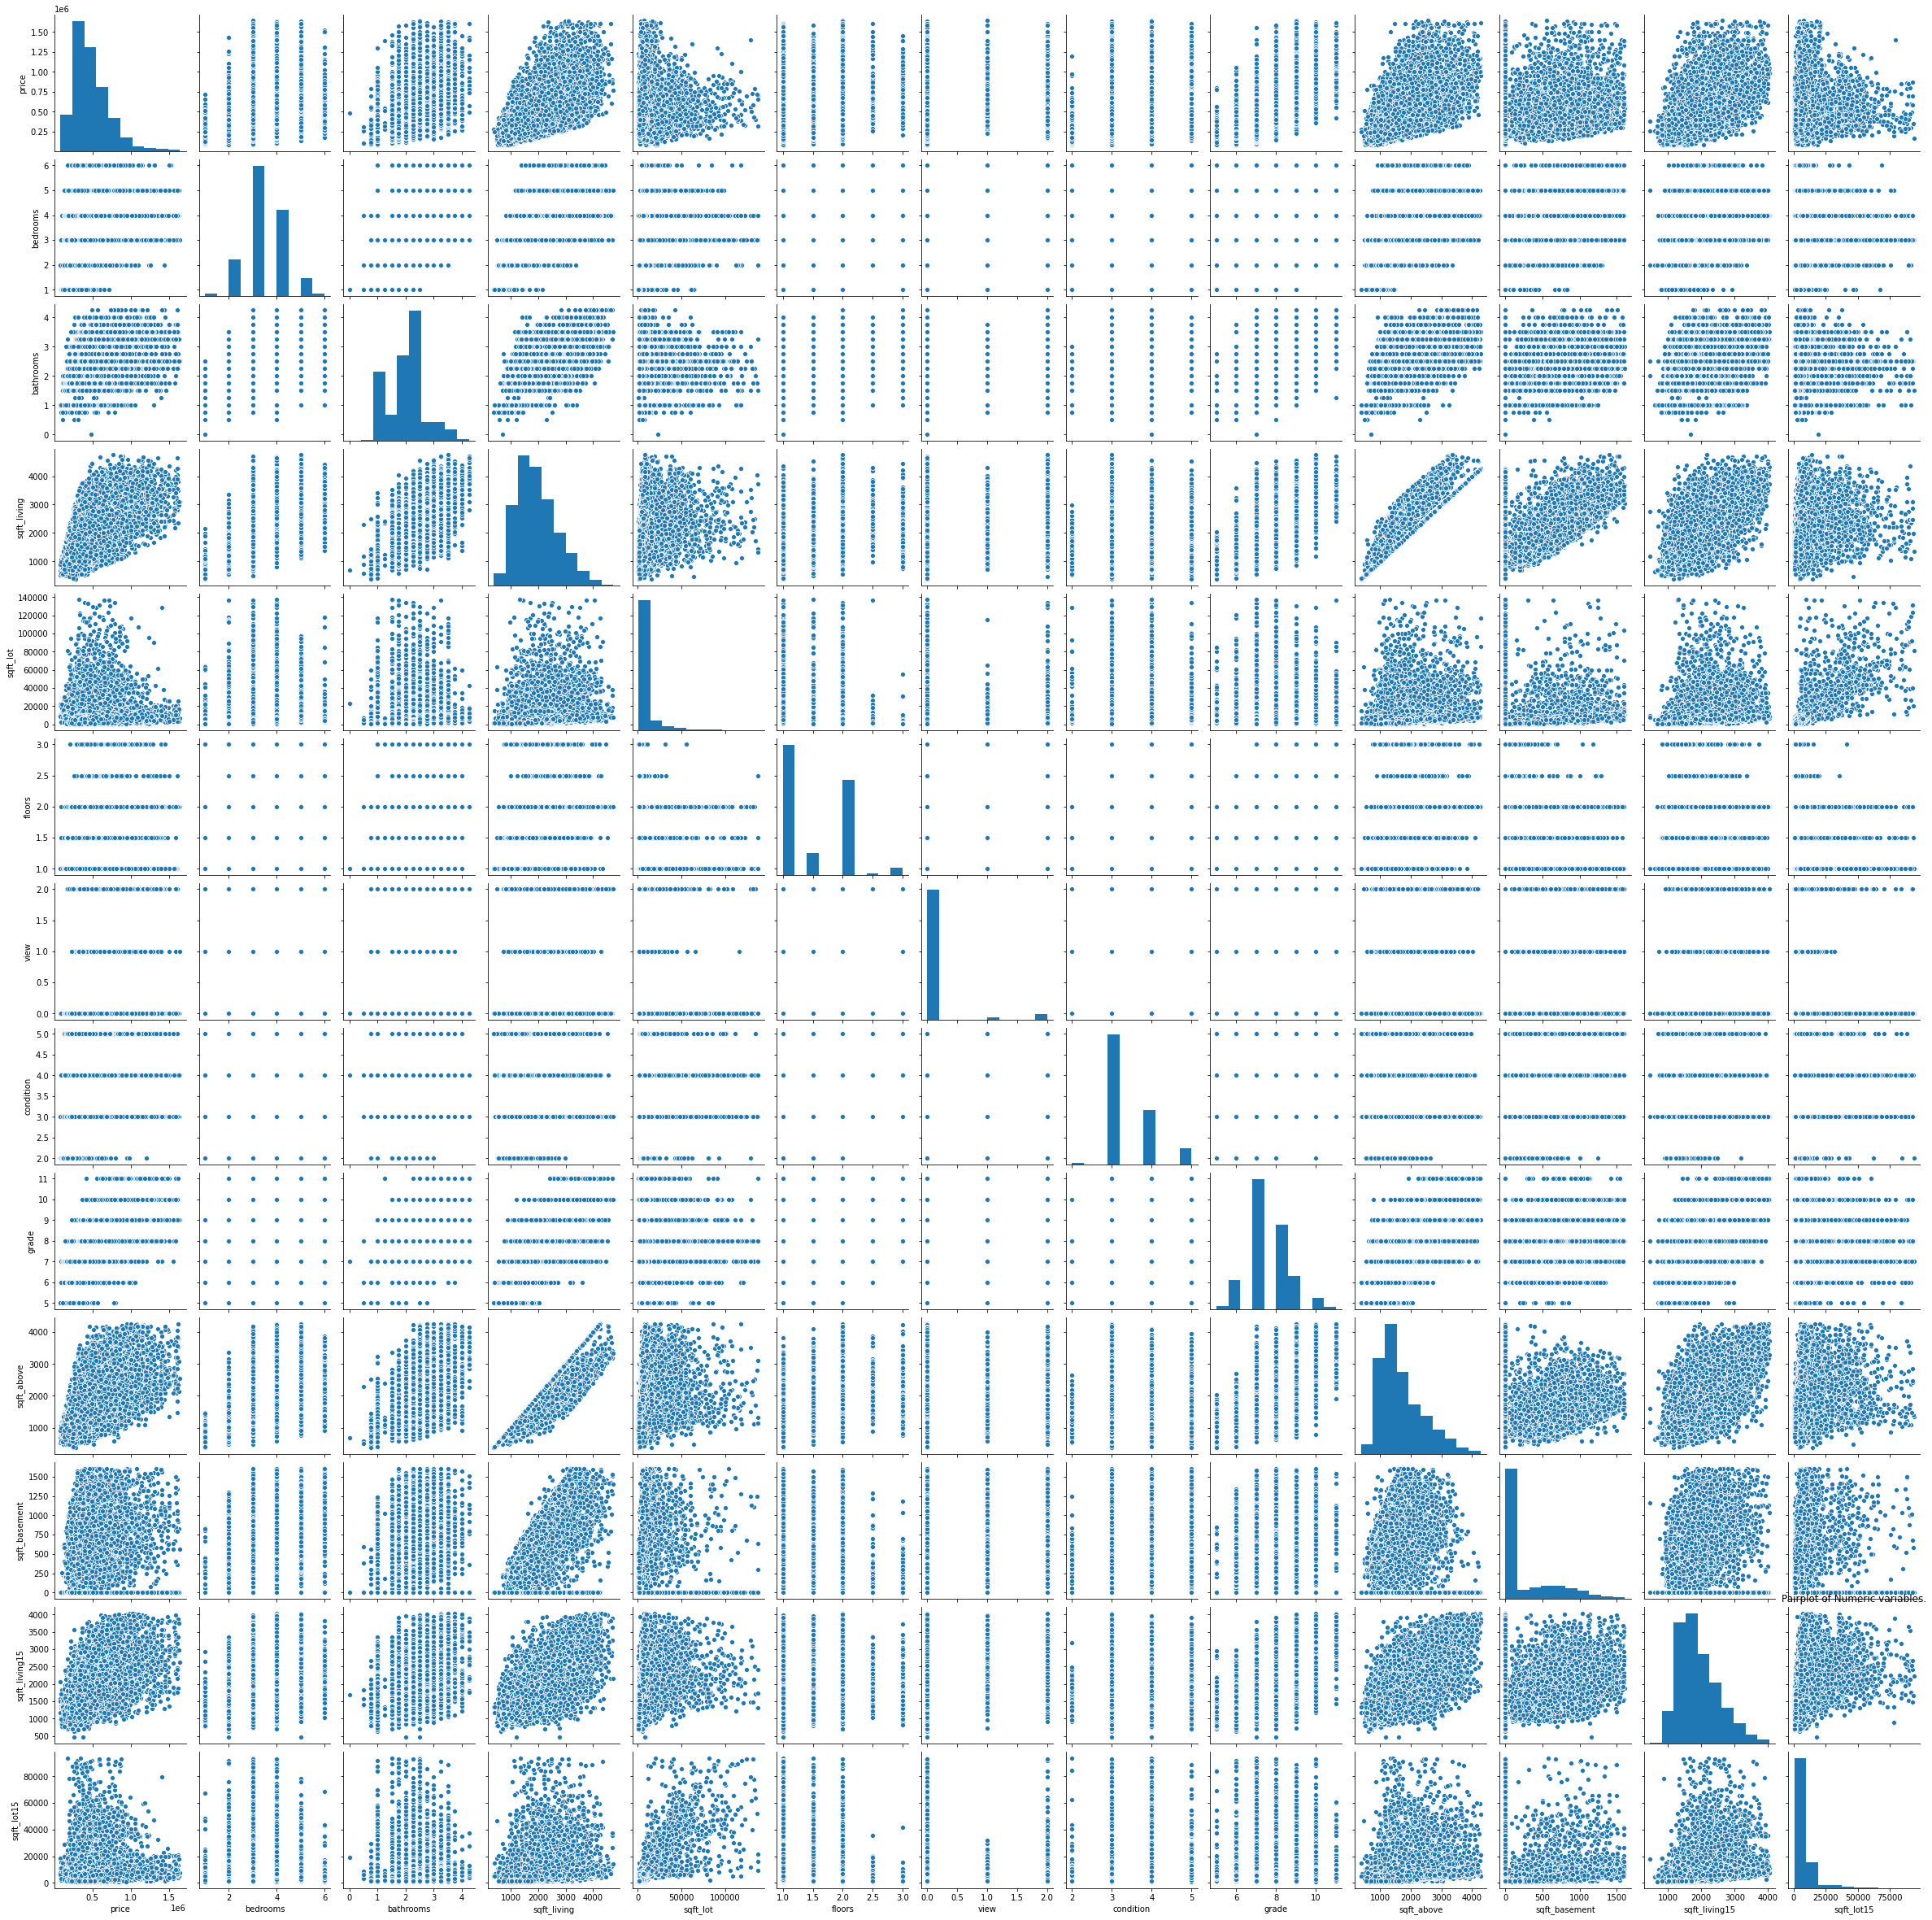

In [0]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(numerical)
plt.title("Pairplot of Numeric variables.")

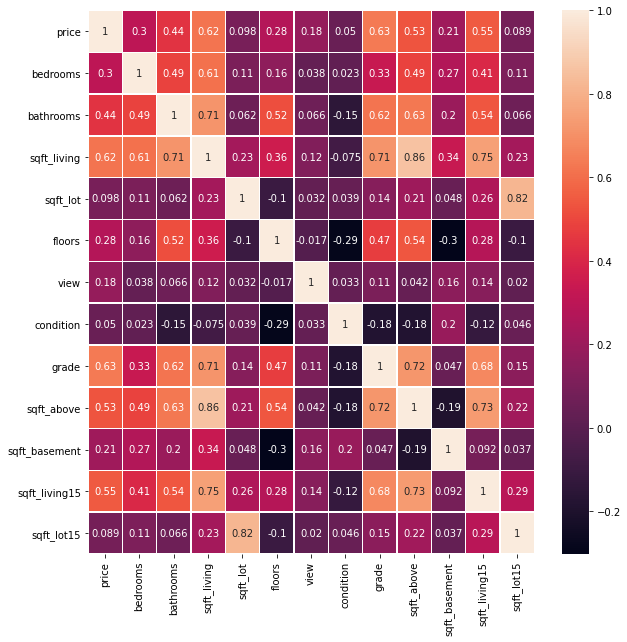

In [0]:
# Create a correlation matrix
corrMatrix = numerical.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

> ## iii) Multivariate Analysis

**Linear Discriminant Analysis**

In [0]:
numerical.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
df2 = df1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement']]

In [0]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18898 entries, 0 to 18897
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18898 non-null  float64
 1   bedrooms       18898 non-null  int64  
 2   bathrooms      18898 non-null  float64
 3   sqft_living    18898 non-null  int64  
 4   sqft_lot       18898 non-null  int64  
 5   floors         18898 non-null  float64
 6   view           18898 non-null  int64  
 7   condition      18898 non-null  int64  
 8   grade          18898 non-null  int64  
 9   sqft_above     18898 non-null  int64  
 10  sqft_basement  18898 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.6 MB
None


In [0]:
# Separating our response variable from the predictor variable
data1 = df2.drop(['price'], 1)
price_label = df2.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement'], 1)

data1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0,3,7,1180,0
1,2,1.00,770,10000,1.0,0,3,6,770,0
2,4,3.00,1960,5000,1.0,0,5,7,1050,910
3,3,2.00,1680,8080,1.0,0,3,8,1680,0
4,3,2.25,1715,6819,2.0,0,3,7,1715,0
...,...,...,...,...,...,...,...,...,...,...
18893,3,2.50,1530,1131,3.0,0,3,8,1530,0
18894,4,2.50,2310,5813,2.0,0,3,8,2310,0
18895,2,0.75,1020,1350,2.0,0,3,7,1020,0
18896,3,2.50,1600,2388,2.0,0,3,8,1600,0


In [0]:
price_label

,price
0,221900.0
1,180000.0
2,604000.0
3,510000.0
4,257500.0
...,...
18893,360000.0
18894,400000.0
18895,402101.0
18896,400000.0


In [0]:

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(data1, price_label)
lda_data1 = lda_.transform(data1)

# Display the coeficients of the reducted columns
lda_.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.23728642e+00, -8.81713233e-01, -1.72496617e-03, ...,
        -1.90286204e+00, -7.58927534e-04, -2.07290965e-03],
       [-6.36259842e-01,  1.13868488e+00, -1.59806678e-03, ...,
        -4.86202549e+00, -9.62346533e-04, -1.30225597e-03],
       [-1.60582171e+00,  3.10915317e-01,  5.15051334e-04, ...,
        -5.09489071e+00,  1.10707718e-03, -1.48045609e-03],
       ...,
       [-1.32435061e+00,  3.06968491e-02,  2.36119386e-03, ...,
         1.96667869e+00,  1.72956466e-03,  1.19052129e-03],
       [ 9.46468526e-01, -6.56531825e-01,  1.10451147e-03, ...,
         1.94014838e+00,  4.33325586e-04,  1.45277624e-03],
       [-2.52791142e+00, -2.20332750e+00,  3.64702227e-03, ...,
         1.82813808e+00,  1.94060312e-03,  3.58142166e-03]])

In [0]:
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=data1.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
bedrooms,1.237286
sqft_lot,0.000036
sqft_above,-0.000759
sqft_living,-0.001725
sqft_basement,-0.002073
view,-0.444197
bathrooms,-0.881713
floors,-0.894193
grade,-1.902862
condition,-2.160378


> # **Recommendation**

From our analysis we can comfortably conclude that we can use a linear combination of bedrooms and sqft_lot to predict the price of a house.

# Regression Analysis

In [0]:
# Detecting Multicollinearity on the predictor variables & Checking for multicollinearity on the independent variables only

independent = data1
correlations = independent.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
bedrooms,1.000000,0.489364,0.608923,0.108317,0.161965,0.038085,0.023397,0.334829,0.486350,0.271686
bathrooms,0.489364,1.000000,0.711585,0.061803,0.519822,0.065790,-0.145497,0.619867,0.633098,0.198934
sqft_living,0.608923,0.711585,1.000000,0.226966,0.358332,0.122130,-0.074899,0.711689,0.857782,0.338006
sqft_lot,0.108317,0.061803,0.226966,1.000000,-0.099544,0.032426,0.039127,0.137351,0.210503,0.047758
floors,0.161965,0.519822,0.358332,-0.099544,1.000000,-0.016633,-0.287666,0.473734,0.538736,-0.302505
view,0.038085,0.065790,0.122130,0.032426,-0.016633,1.000000,0.033360,0.107221,0.042370,0.155516
condition,0.023397,-0.145497,-0.074899,0.039127,-0.287666,0.033360,1.000000,-0.182236,-0.184681,0.195195
grade,0.334829,0.619867,0.711689,0.137351,0.473734,0.107221,-0.182236,1.000000,0.716017,0.047309
sqft_above,0.486350,0.633098,0.857782,0.210503,0.538736,0.042370,-0.184681,0.716017,1.000000,-0.193824
sqft_basement,0.271686,0.198934,0.338006,0.047758,-0.302505,0.155516,0.195195,0.047309,-0.193824,1.000000


In [0]:
# Computing the Variance Inflation Factor, new df with inverse correlation

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
bedrooms,1.698178,-0.336974,2.479722e+00,0.054082,0.118790,0.058208,-0.079648,0.344913,-3.437143e+00,-1.876627e+00
bathrooms,-0.336974,2.615754,-2.033962e+00,0.075507,-0.854493,0.039645,0.063968,-0.416019,1.052935e+00,2.028826e-01
sqft_living,2.472805,-2.038766,7.291825e+13,0.420722,4.195269,-1.947372,1.438037,0.779138,-6.995313e+13,-3.820545e+13
sqft_lot,0.054082,0.075507,4.215630e-01,1.127806,0.300581,-0.003050,-0.024392,-0.019340,-8.843021e-01,-3.006800e-01
floors,0.118790,-0.854493,4.198294e+00,0.300581,2.000870,0.011152,0.204908,-0.284242,-4.322567e+00,-1.558044e+00
view,0.058208,0.039645,-1.947810e+00,-0.003050,0.011152,1.039428,-0.022772,-0.109871,1.805011e+00,8.363076e-01
condition,-0.079648,0.063968,1.436488e+00,-0.024392,0.204908,-0.022772,1.120135,0.114237,-1.387604e+00,-9.026415e-01
grade,0.344913,-0.416019,7.963163e-01,-0.019340,-0.284242,-0.109871,0.114237,2.485843,-2.369039e+00,-9.476702e-01
sqft_above,-3.436185,1.048376,-6.995313e+13,-0.882979,-4.317031,1.804051,-1.389696,-2.351445,6.710858e+13,3.665188e+13
sqft_basement,-1.872648,0.202442,-3.820545e+13,-0.299847,-1.554425,0.835707,-0.903866,-0.937945,3.665188e+13,2.001771e+13


Residual Plots and Heteroscedasticity Test

In [0]:
# Splitting our data into training and test sets

from sklearn.model_selection import KFold, cross_val_score, train_test_split


X = independent.values
y = df2['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, price_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# This is our prediction for price based on our model
price_predict = regressor.predict(X_test)

In [0]:
# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
x = pd.DataFrame(residuals).describe()
x

,0
count,3780.000000
mean,90.252000
std,165213.512592
min,-943730.840989
25%,-82095.842813
50%,13189.491759
75%,108378.682609
max,606467.210245


In [0]:
# Getting the mean for the residuals
residuals.mean()


90.25199981653107

The Residual Plot

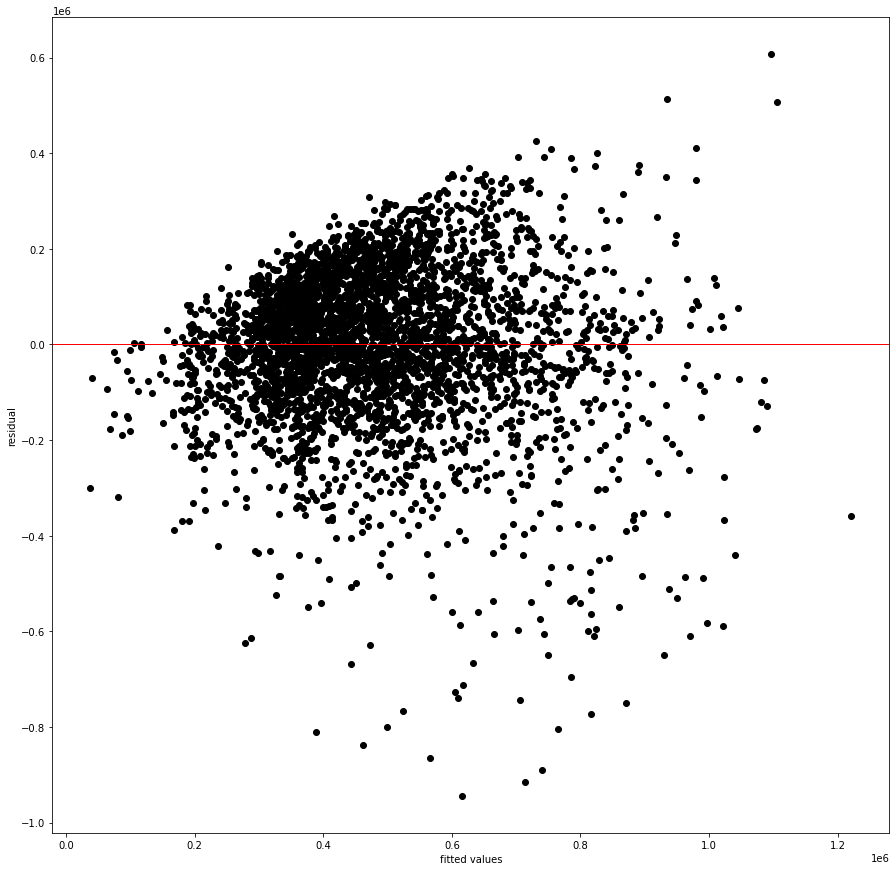

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Barlett's Test of Heteroscedasticity

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

3800.6868078746343
The variances are homogeneous.


> ## i) Multiple Linear Regression

In [0]:
# Defining our predictor and target variables as follows

X = data1
y = price_label

In [0]:
#Spliting our training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [105]:
# Training the Algorithim

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Getting the coefficients of our regression model 
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df



In [0]:
# Making predictions

y_pred = regressor.predict(X_test)
print(y_pred)

[[475112.14424672]
 [742929.8566849 ]
 [364167.61781371]
 ...
 [527803.69867402]
 [508175.82965748]
 [491851.31230211]]


In [0]:
# To compare the actual output values for y_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We get the value of root mean squared error as 165191.68216185298, 
# which is  greater than 10% of the mean value of the price of all houses. 
# This means that our algorithm was not very accurate and cannot make good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 2. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.
# 3. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.

Mean Absolute Error: 122616.47965150878
Mean Squared Error: 27288291855.462658
Root Mean Squared Error: 165191.68216185298


> ## ii) Quantile Regression

In [0]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement'],
      dtype='object')

In [0]:
# Quantile regression features, features used are the ones selected from our multivariate analysis.

bedrooms	= df2['bedrooms'].values
sqft_lot	= df2['sqft_lot'].values


# Defining x and y
x = df2.drop(['price', 'bathrooms', 'sqft_living','floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement'], axis=1)
y = df2['price'].values

In [0]:
# Fitting our  quantile model using the bedroom feature
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ bedrooms', new_df)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.03956
Model:                       QuantReg   Bandwidth:                   3.758e+04
Method:                 Least Squares   Sparsity:                    5.144e+05
Date:                Tue, 09 Jun 2020   No. Observations:                18898
Time:                        15:06:05   Df Residuals:                    18896
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.039e+05   7575.043     26.917      0.000    1.89e+05    2.19e+05
bedrooms     7.11e+04   2210.049     32.171      0.000    6.68e+04    7.54e+04
*****************************************************************
Intercept    203900.000001
bedrooms      71099.999999
dtype: floa

In [0]:
# Fitting the quantiles

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res1 = model.fit(q = q)
  models.append(res1)
  param.append([q, res1.params['Intercept'], res1.params['bedrooms']] + res1.conf_int().loc['bedrooms'].tolist())

# We then make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'bedrooms_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

,quantile,intercept,bedrooms_coef,cf_lower_bound,cf_upper_bound
0,0.25,150299.999992,49900.000002,46654.656444,53145.343559
1,0.50,203900.000001,71099.999999,66768.106631,75431.893368
2,0.75,241999.999999,106500.000000,101104.033626,111895.966374


In [0]:
# We do a Linear regression using OLS

ols = smf.ols('y ~ bedrooms', df).fit()
print(ols.summary())

param1 = ols.conf_int().loc['bedrooms'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           bedrooms_coef = ols.params['bedrooms'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:06:33   Log-Likelihood:            -2.5928e+05
No. Observations:               18898   AIC:                         5.186e+05
Df Residuals:                   18896   BIC:                         5.186e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+05   6476.428     31.619      0.0

Text(0, 0.5, 'y')

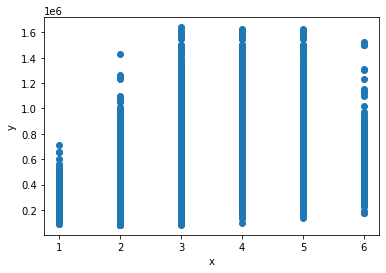

In [0]:
x_ = bedrooms
y_ = new_df['price'].values

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")

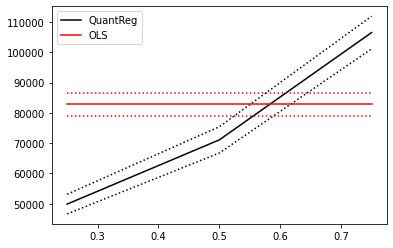

In [0]:

n = param.shape[0]
p1 = plt.plot(param['quantile'], param['bedrooms_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['bedrooms_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

In [0]:
# Fitting our  quantile model using the sqft_lot feature
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ sqft_lot', df2)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.005480
Model:                       QuantReg   Bandwidth:                   3.829e+04
Method:                 Least Squares   Sparsity:                    5.017e+05
Date:                Tue, 09 Jun 2020   No. Observations:                18898
Time:                        15:08:10   Df Residuals:                    18896
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.132e+05   2402.951    171.943      0.000    4.08e+05    4.18e+05
sqft_lot       1.9189      0.158     12.167      0.000       1.610       2.228

The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [75]:
# Fitting the quantiles

quantiles = [0.25,0.5,0.75]
models = []
param = []

for q in quantiles:
  res1 = model.fit(q = q)
  models.append(res1)
  param.append([q, res1.params['Intercept'], res1.params['sqft_lot']] + res1.conf_int().loc['sqft_lot'].tolist())

# We then make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'sqft_lot_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


,quantile,intercept,sqft_lot_coef,cf_lower_bound,cf_upper_bound
0,0.25,300369.995498,1.215096,0.986377,1.443816
1,0.50,413171.296410,1.918945,1.609810,2.228080
2,0.75,567241.375965,2.593637,2.153526,3.033748


In [82]:
# We do a Linear regression using OLS

ols = smf.ols('y ~ sqft_lot', df2).fit()
print(ols.summary())

param1 = ols.conf_int().loc['sqft_lot'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           sqft_lot_coef = ols.params['sqft_lot'],
           cf_lower_bound = param1[0],
           cf_upper_bound = param1[1])

print(ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           2.63e-41
Time:                        15:22:18   Log-Likelihood:            -2.6010e+05
No. Observations:               18898   AIC:                         5.202e+05
Df Residuals:                   18896   BIC:                         5.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.606e+05   2200.484    209.297      0.0

Text(0, 0.5, 'y')

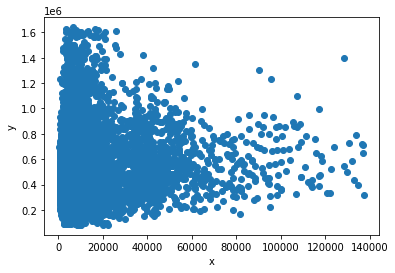

In [77]:
x_ = sqft_lot
y_ = df2['price'].values

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")

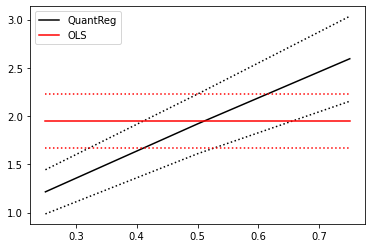

In [83]:
n = param.shape[0]
p1 = plt.plot(param['quantile'], param['sqft_lot_coef'],color='black' ,label = 'QuantReg')
p2 = plt.plot(param['quantile'], param['cf_upper_bound'], linestyle = 'dotted', color='black')
p3 = plt.plot(param['quantile'], param['cf_lower_bound'], linestyle = 'dotted', color='black')
p4 = plt.plot(param['quantile'], [ols['sqft_lot_coef']]* n , color = 'red', label = 'OLS')
p5 = plt.plot(param['quantile'], [ols['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
p6 = plt.plot(param['quantile'], [ols['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

> ## iii) Lasso Regression

In [0]:
# Defining our x and y

X = df2.drop('price', 1)
y = df2['price']


In [0]:
# Scaling data 
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [88]:
# We will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# The alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5035666121173974
lasso MSE: 26442775577.541595
lasso coef: [-13794.90314243 -21296.80346901 160884.94121345  -9990.73823615
  12152.97392795  19137.07795356  33719.79634619 100491.06330694
 -69771.58545666 -21156.79420587]


In [89]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# We define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# We made necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,5,0.1), np.arange(2, 10, 0.5), np.arange(5, 30, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 19.0}
lasso score: 0.49815990798371435
linear score: 0.49824158457806667
lasso MSE: 27794299526.311653
linear MSE: 27789775886.68255
lasso best estimator coef: [-15463.41733628 -19707.28842308 121031.53126468 -10762.24961171
  10698.02958044  17992.16547439  34128.47296833  98301.19088176
 -29082.53710103    802.20358046]
linear coef: [-1.50526834e+04 -2.03229031e+04  1.85599176e+18 -1.02908826e+04
  1.04483931e+04  1.81654770e+04  3.40269733e+04  9.83465621e+04
 -1.78052043e+18 -9.72445244e+17]


> ## iv) Ridge Regression

In [0]:
# Defining our x and y

X = df2.drop(['price'], 1)
y = df2['price']

In [91]:
# Creating our baseline regression model with no regularization 
# 
regression = LinearRegression()
regression.fit(X,y)
model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(model)

# The output  value of 26442775570.774715 will be our indicator to determine if the regularized ridge regression model is superior or not.

26442775570.774715


In [0]:
# We first determine the most appropriate value for the l2 regularization using GridSearchCV 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-1,5,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [93]:
# We use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 
 

26690402644.7644

In [94]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

26445500433.724003


In [95]:
# The 26445500433.724003 is lower than the 26690402644.7644 This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,new_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are different. This means that the penalization made a huge difference with this dataset.

{'bathrooms': -0.8636670615524054,
 'bedrooms': 94.33134708690159,
 'condition': 69.10171385893454,
 'floors': 52134.93842316034,
 'id': -16295.650922679428,
 'price': -31003.47531838586,
 'sqft_living': 22525.404769528803,
 'sqft_lot': 47785.82532018763,
 'view': 25.22963323071781,
 'waterfront': 98078.81177653674}

> ## v) Elastic Net Regression

In [0]:
# Defining our X and y variables

X = df2.drop('price', 1)
y = df2['price']

In [97]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(model) 

# This mean standard error score of 26442775570.774715 is our benchmark for determining 
# if the elastic net model will be better or worst. 

26442775570.774715


In [98]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -31003.47531838586,
 'bedrooms': -16295.650922679428,
 'condition': 52134.93842316034,
 'floors': 22525.404769528803,
 'grade': 98078.81177653674,
 'sqft_above': 25.22963323071781,
 'sqft_basement': 69.10171385893454,
 'sqft_living': 94.33134708690159,
 'sqft_lot': -0.8636670615524054,
 'view': 47785.82532018763}

In [0]:
# Elastic Net Model
# We normalize data then create a grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-2,5,4),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [100]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

49195980863.480804

In [101]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.85. 
# With these settings we got an MSE of 26494406961.630272. This is above our baseline model of MSE 26442775570.774715  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.75)
elastic.fit(X,y)
model_2=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(model_2)

26494406961.630272


In [102]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are different.  
# This means that this values was  good to the algorithm. Traditional regression can do this.

{'bathrooms': -21355.204379630173,
 'bedrooms': -14094.121490372176,
 'condition': 49006.912059482536,
 'floors': 20558.061701841838,
 'grade': 90742.88131451266,
 'sqft_above': 48.37497693047781,
 'sqft_basement': 86.294200571509,
 'sqft_living': 68.21049573186106,
 'sqft_lot': -0.742052213271271,
 'view': 47844.27876970064}